In [1]:
import pandas as pd
import numpy as np 
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.callbacks import EarlyStopping
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, OneHotEncoder

In [2]:
data = pd.read_csv("employeeAfterCleaning.csv")
data=data.drop(['ID'],axis=1,inplace=False)
label_encoder = LabelEncoder()
data['Marital Status'] = label_encoder.fit_transform(data['Marital Status'])
data['Gender'] = label_encoder.fit_transform(data['Gender'])
data['Home Owner'] = label_encoder.fit_transform(data['Home Owner'])
data['Purchased Bike'] = label_encoder.fit_transform(data['Purchased Bike'])
data['Education'] = label_encoder.fit_transform(data['Education'])
data['Occupation'] = label_encoder.fit_transform(data['Occupation'])
data['Region'] = label_encoder.fit_transform(data['Region'])

In [3]:
X = data.drop('Purchased Bike', axis=1)
y = data['Purchased Bike']
X

,Marital Status,Gender,Income,Children,Education,Occupation,Home Owner,Cars,Commute Distance (Miles),Region,Age
0,0,0,40000.0,1,0,4,1,0,1,0,42.0
1,0,1,30000.0,3,3,0,1,1,1,0,43.0
2,0,1,80000.0,5,3,3,0,2,5,0,60.0
3,1,1,70000.0,0,0,3,1,1,10,2,41.0
4,1,1,30000.0,0,0,0,0,0,1,0,36.0
...,...,...,...,...,...,...,...,...,...,...,...
999,1,0,100000.0,0,0,3,0,1,10,2,40.0
1000,0,0,20000.0,2,3,2,1,0,1,0,63.0
1001,0,1,10000.0,0,3,2,0,1,1,2,26.0
1002,1,0,20000.0,0,2,2,0,1,10,0,31.0


In [4]:
X

,Marital Status,Gender,Income,Children,Education,Occupation,Home Owner,Cars,Commute Distance (Miles),Region,Age
0,0,0,40000.0,1,0,4,1,0,1,0,42.0
1,0,1,30000.0,3,3,0,1,1,1,0,43.0
2,0,1,80000.0,5,3,3,0,2,5,0,60.0
3,1,1,70000.0,0,0,3,1,1,10,2,41.0
4,1,1,30000.0,0,0,0,0,0,1,0,36.0
...,...,...,...,...,...,...,...,...,...,...,...
999,1,0,100000.0,0,0,3,0,1,10,2,40.0
1000,0,0,20000.0,2,3,2,1,0,1,0,63.0
1001,0,1,10000.0,0,3,2,0,1,1,2,26.0
1002,1,0,20000.0,0,2,2,0,1,10,0,31.0


In [5]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [6]:
X_train

,Marital Status,Gender,Income,Children,Education,Occupation,Home Owner,Cars,Commute Distance (Miles),Region,Age
78,0,1,30000.0,0,0,0,1,0,1,0,47.0
29,1,0,20000.0,1,2,2,0,1,10,0,31.0
280,1,0,30000.0,3,1,0,0,0,1,0,46.0
507,0,0,60000.0,2,2,3,1,2,10,1,49.0
652,1,1,40000.0,0,2,4,0,2,1,1,28.0
...,...,...,...,...,...,...,...,...,...,...,...
106,1,0,30000.0,1,3,2,0,0,1,0,46.0
270,0,0,10000.0,2,2,2,1,0,1,0,37.0
860,0,1,60000.0,1,3,4,1,1,1,1,46.0
435,1,1,30000.0,0,2,2,0,1,2,0,32.0


In [7]:
# Standardize the data
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [8]:
X_train_df = pd.DataFrame(X_train, columns=X.columns)
X_train_df

,Marital Status,Gender,Income,Children,Education,Occupation,Home Owner,Cars,Commute Distance (Miles),Region,Age
0,-0.959715,1.029065,-0.847803,-1.152874,-1.207517,-1.532155,0.682150,-1.282410,-0.925315,-1.260431,0.257064
1,1.041976,-0.971756,-1.185662,-0.534052,0.284231,-0.159795,-1.465953,-0.387731,1.404738,-1.260431,-1.156488
2,1.041976,-0.971756,-0.847803,0.703592,-0.461643,-1.532155,-1.465953,-1.282410,-0.925315,-1.260431,0.168717
3,-0.959715,-0.971756,0.165774,0.084770,0.284231,0.526385,0.682150,0.506948,1.404738,0.181344,0.433759
4,1.041976,1.029065,-0.509944,-1.152874,0.284231,1.212565,-1.465953,0.506948,-0.925315,0.181344,-1.421529
...,...,...,...,...,...,...,...,...,...,...,...
798,1.041976,-0.971756,-0.847803,-0.534052,1.030105,-0.159795,-1.465953,-1.282410,-0.925315,-1.260431,0.168717
799,-0.959715,-0.971756,-1.523521,0.084770,0.284231,-0.159795,0.682150,-1.282410,-0.925315,-1.260431,-0.626406
800,-0.959715,1.029065,0.165774,-0.534052,1.030105,1.212565,0.682150,-0.387731,-0.925315,0.181344,0.168717
801,1.041976,1.029065,-0.847803,-1.152874,0.284231,-0.159795,-1.465953,-0.387731,-0.666420,-1.260431,-1.068141


In [9]:
model = Sequential()
# model.add(Dense(64, input_dim=X_train.shape[1], activation='relu'))
model.add(Dense(32, activation='linear'))
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(64, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(8, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(4, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(1, activation='sigmoid'))

model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])


In [10]:
early_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)

EPOCHS = 100
BATCH_SIZE = 32


In [11]:
history = model.fit(X_train, y_train, 
                    validation_split=0.2, 
                    epochs=EPOCHS, 
                    batch_size=BATCH_SIZE, 
                    callbacks=[early_stopping])


Epoch 1/100
21/21 ━━━━━━━━━━━━━━━━━━━━ 3s 13ms/step - accuracy: 0.4931 - loss: 0.7370 - val_accuracy: 0.5093 - val_loss: 0.6877
Epoch 2/100
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.5065 - loss: 0.6957 - val_accuracy: 0.5963 - val_loss: 0.6801
Epoch 3/100
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.5468 - loss: 0.6777 - val_accuracy: 0.6211 - val_loss: 0.6648
Epoch 4/100
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5598 - loss: 0.6733 - val_accuracy: 0.6149 - val_loss: 0.6480
Epoch 5/100
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.5615 - loss: 0.6777 - val_accuracy: 0.6273 - val_loss: 0.6503
Epoch 6/100
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6417 - loss: 0.6601 - val_accuracy: 0.6646 - val_loss: 0.6579
Epoch 7/100
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.5791 - loss: 0.6738 - val_accuracy: 0.6460 - val_loss: 0.6518
Epoch 8/100
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6247 - loss: 0.6603 - val_accuracy: 0.6522 - 

In [12]:
results = model.evaluate(X_test, y_test)
print(f"Test Loss: {results[0]}")
print(f"Test Accuracy: {results[1]}")


7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.5919 - loss: 0.7006 
Test Loss: 0.6747334003448486
Test Accuracy: 0.6218905448913574


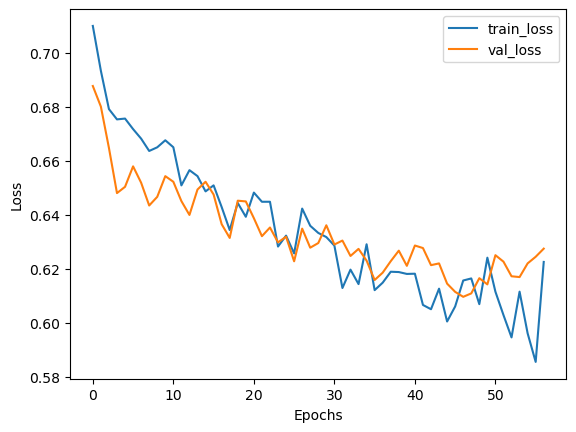

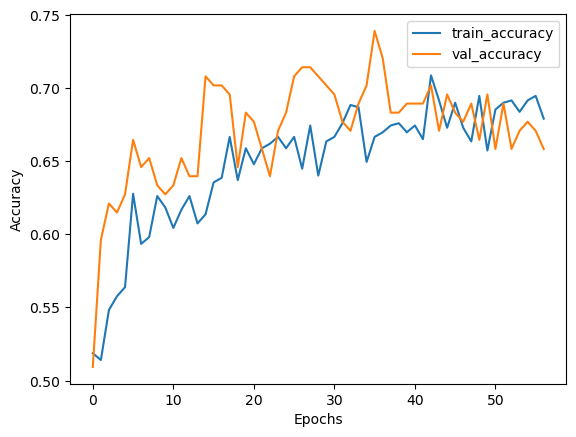

In [13]:
import matplotlib.pyplot as plt

plt.plot(history.history['loss'], label='train_loss')
plt.plot(history.history['val_loss'], label='val_loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

plt.plot(history.history['accuracy'], label='train_accuracy')
plt.plot(history.history['val_accuracy'], label='val_accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()
